In [ ]:
Pkg.add("TestImages")
Pkg.add("ImageFeatures")
Pkg.add("Images")
Pkg.add("ImageView")
Pkg.update()

In [1]:
Pkg.build("Cairo")

INFO: Building Homebrew
INFO: Building Cairo


In [2]:
using PyPlot
using TestImages
using ImageFeatures
using Images
using ImageView

INFO: Precompiling module ImageView.


### About hog
- https://github.com/JuliaImages/ImageFeatures.jl/blob/master/docs/src/tutorials/object_detection.md

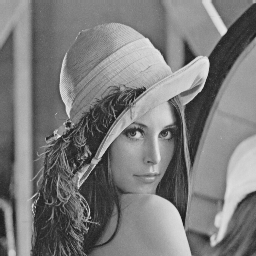

In [84]:
img = testimage("lena_gray")

In [93]:
typeof(img)

Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2}

In [91]:
img_as_array = convert(Array{Float32},img);

In [92]:
minimum(img_as_array), maximum(img_as_array)

(0.10196079f0, 0.9490197f0)

## Descriptors

In [8]:
img = testimage("lena_gray")
gx = imfilter(img, centered([-1 0 1]))
gy = imfilter(img, centered([-1 0 1]'));

In [39]:
size(img), size(gx)

((256, 256), (256, 256))

In [59]:
img = testimage("lena_gray")
gx = imfilter(img, centered([-1 0 1]))
gy = imfilter(img, centered([-1 0 1]'));

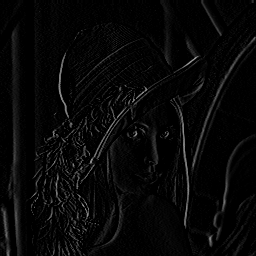

In [48]:
gx

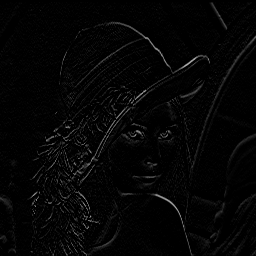

In [50]:
gy

### We can plot using PyPlot if we convert the images to standard arrays

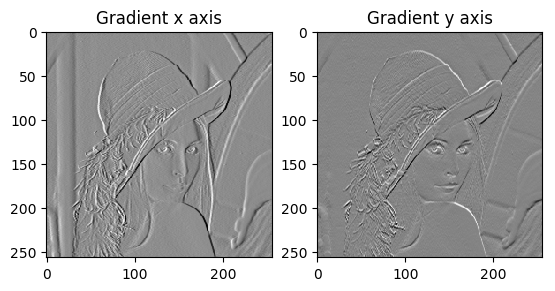

In [99]:
figure, axis = PyPlot.subplots(1,2);

axis[1][:imshow](convert(Array{Float32},gx), cmap="gray")
axis[1][:set_title]("Gradient x axis" )

axis[2][:imshow](convert(Array{Float32},gy), cmap="gray")
axis[2][:set_title]("Gradient y axis")

PyPlot.show()

## HOG descriptor

In [53]:
?(HOG)

search: HOG hough_circle_gradient hough_transform_standard morphogradient



```
hog_params = HOG([orientations = 9], [cell_size = 8], [block_size = 2], [block_stride = 1], [norm_method = "L2-norm"])
```

Histogram of Oriented Gradient (HOG) is a dense feature desciptor usually used for object detection. See "Histograms of Oriented Gradients for Human Detection" by Dalal and Triggs.

Parameters:  

  * orientations   = number of orientation bins
  * cell_size      = size of a cell is cell_size x cell_size (in pixels)
  * block_size     = size of a block is block_size x block_size (in terms of cells)
  * block_stride   = stride of blocks. Controls how much adjacent blocks overlap.
  * norm_method    = block normalization method. Options: L2-norm, L2-hys, L1-norm, L2-sqrt.


In [54]:
#?create_descriptor

In [55]:
h = HOG(orientations=9,
        cell_size=8,
        block_size = 2,
        block_stride = 1,
        norm_method="L2-norm")

ImageFeatures.HOG(9, 8, 2, 1, "L2-norm")

In [6]:
create_descriptor(img, HOG()) 

LoadError: [91mUndefVarError: img not defined[39m

In [8]:
pwd()

"/Users/macpro/Documents/git_stuff/learn_julia/Images"

In [11]:
using Images, ImageFeatures
pos_examples = "./tutorial/humans/"
neg_examples = "./tutorial/not_humans/"


"./tutorial/not_humans/"

In [13]:
readdir(pos_examples)

LoadError: [91mSystemError: unable to read directory ./tutorial/humans/: No such file or directory[39m

In [10]:
n_pos = length(readdir(pos_examples))   # number of positive training examples
n_neg = length(readdir(neg_examples))   # number of negative training examples
n = n_pos + n_neg                       # number of training examples 
data = Array{Float64}(3780, n)          # Array to store HOG descriptor of each image. Each image in our training data has size 128x64 and so has a 3780 length 
labels = Vector{Int}(n)                 # Vector to store label (1=human, 0=not human) of each image.



LoadError: [91mSystemError: unable to read directory ./tutorial/humans/: No such file or directory[39m